In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\beytu\BAG_notebooks\Datasets\AMZN.csv",
                 usecols = ["Date", "Close"],
                 index_col = "Date", 
                 parse_dates = ["Date"], dayfirst = True).sort_index()
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2022-12-06,88.250000
2022-12-07,88.459999
2022-12-08,90.349998


In [3]:
# converting time series to specified frequency
df = df.asfreq('D')
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-17,NaN
1997-05-18,NaN
1997-05-19,0.085417
...,...
2022-12-08,90.349998
2022-12-09,89.089996
2022-12-10,NaN


In [4]:
# filling missing values with interpolate()
df = df.interpolate()
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-17,0.086111
1997-05-18,0.085764
1997-05-19,0.085417
...,...
2022-12-08,90.349998
2022-12-09,89.089996
2022-12-10,88.894997


In [5]:
# getting the percent change from the previous value of a variable
df['trend'] = df.Close.pct_change()
df.tail(10)

,Close,trend
Date,,
2022-12-03,93.089999,-0.011049
2022-12-04,92.050001,-0.011172
2022-12-05,91.010002,-0.011298
2022-12-06,88.250000,-0.030326
2022-12-07,88.459999,0.002380
2022-12-08,90.349998,0.021366
2022-12-09,89.089996,-0.013946
2022-12-10,88.894997,-0.002189
2022-12-11,88.699997,-0.002194


In [6]:
bb = pd.read_csv(r"C:\Users\beytu\BAG_notebooks\Datasets\bike_buyers.csv")
bb.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


<AxesSubplot:title={'center':'Bike Buyers by Commute Distance'}>

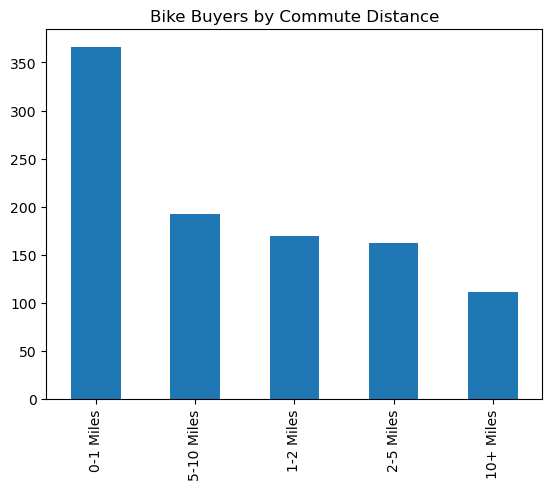

In [7]:
bb['Commute Distance'].value_counts().plot(kind='bar', title='Bike Buyers by Commute Distance')

<AxesSubplot:xlabel='Income', ylabel='Cars'>

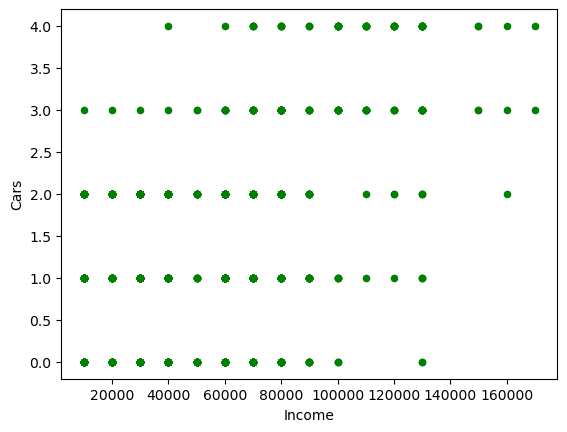

In [8]:
bb.plot(x='Income', y='Cars', kind='scatter', color='g')

In [9]:
# divide the entire 'x' range into equal y portions and the population in each bin will follow accordingly

pd.cut(bb['Income'], bins = 5).value_counts()
# the interval in each range is equal, but the population in each group is very different

(9840.0, 42000.0]       434
(42000.0, 74000.0]      328
(74000.0, 106000.0]     157
(106000.0, 138000.0]     65
(138000.0, 170000.0]     10
Name: Income, dtype: int64

In [10]:
# adding a new column in a specific location

bb.insert(loc=4, column='income_class', value=pd.cut(bb['Income'], bins = 5, labels = ["standard", "good", "very good", "rich", "super rich"]))
bb.head()

,ID,Marital Status,Gender,Income,income_class,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,standard,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,standard,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,very good,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,good,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,standard,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [11]:
income_avg = bb.Income.mean()
# filtering using logical expressions
bb.query("(Income >= @income_avg) & (Children > 0) & (Age < 45)  & (`Purchased Bike` == 'No')").tail()

,ID,Marital Status,Gender,Income,income_class,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
943,24322,Married,Female,60000.0,good,4.0,Bachelors,Skilled Manual,NaN,2.0,0-1 Miles,North America,42.0,No
950,11788,Single,Female,70000.0,good,1.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,34.0,No
983,11269,Married,Male,130000.0,rich,2.0,Graduate Degree,Management,Yes,2.0,0-1 Miles,North America,41.0,No
989,29134,Married,Male,60000.0,good,4.0,Bachelors,Skilled Manual,No,3.0,10+ Miles,North America,42.0,No
998,19664,Single,Male,100000.0,very good,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [12]:
pd.pivot_table(bb, index=['Region','Gender'], values='Income' , aggfunc=['mean','count'])
#bb.groupby(["Region", "Gender"])["Income"].agg({"mean", "count"})

mean  count
                            Income Income
Region        Gender                     
Europe        Female  39877.300613    163
              Male    41268.656716    134
North America Female  62008.368201    239
              Male    63269.230769    260
Pacific       Female  62352.941176     85
              Male    64411.764706    102

In [13]:
# a frequency table that is a cross-tabulation of two variables

pd.crosstab(bb['Commute Distance'], bb['Purchased Bike'],
            margins = True,
            margins_name="Total",
            normalize = True
            )

Purchased Bike,No,Yes,Total
Commute Distance,,,
0-1 Miles,0.166,0.200,0.366
1-2 Miles,0.092,0.077,0.169
10+ Miles,0.078,0.033,0.111
2-5 Miles,0.067,0.095,0.162
5-10 Miles,0.116,0.076,0.192
Total,0.519,0.481,1.000


In [14]:
bs = pd.read_csv(r"C:\Users\beytu\BAG_notebooks\Datasets\bike_sharing.csv",
                 header=0,
                 names = ["date_time", "count", "w_temp1", "w_temp2", "w_humidity", "w_wind_speed", "w_weather_code", "is_holiday", "is_weekend", "season"],
                 parse_dates = ["date_time"],
                 index_col = ["date_time"]).sort_index()

bs.loc['2015', 'revenue'] = bs.loc['2015', "count"] * 1.75
bs.loc['2016', 'revenue'] = bs.loc['2016', "count"] * 1.81
bs.loc['2017', 'revenue'] = bs.loc['2017', "count"] * 2.05

bs

,count,w_temp1,w_temp2,w_humidity,w_wind_speed,w_weather_code,is_holiday,is_weekend,season,revenue
date_time,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,318.50
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,241.50
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,234.50
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,126.00
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,82.25
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2136.10
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,1109.05
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,690.85


In [15]:
# aggregation over time-series
bs.resample("D")["count"].sum()

date_time
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: count, Length: 731, dtype: int64

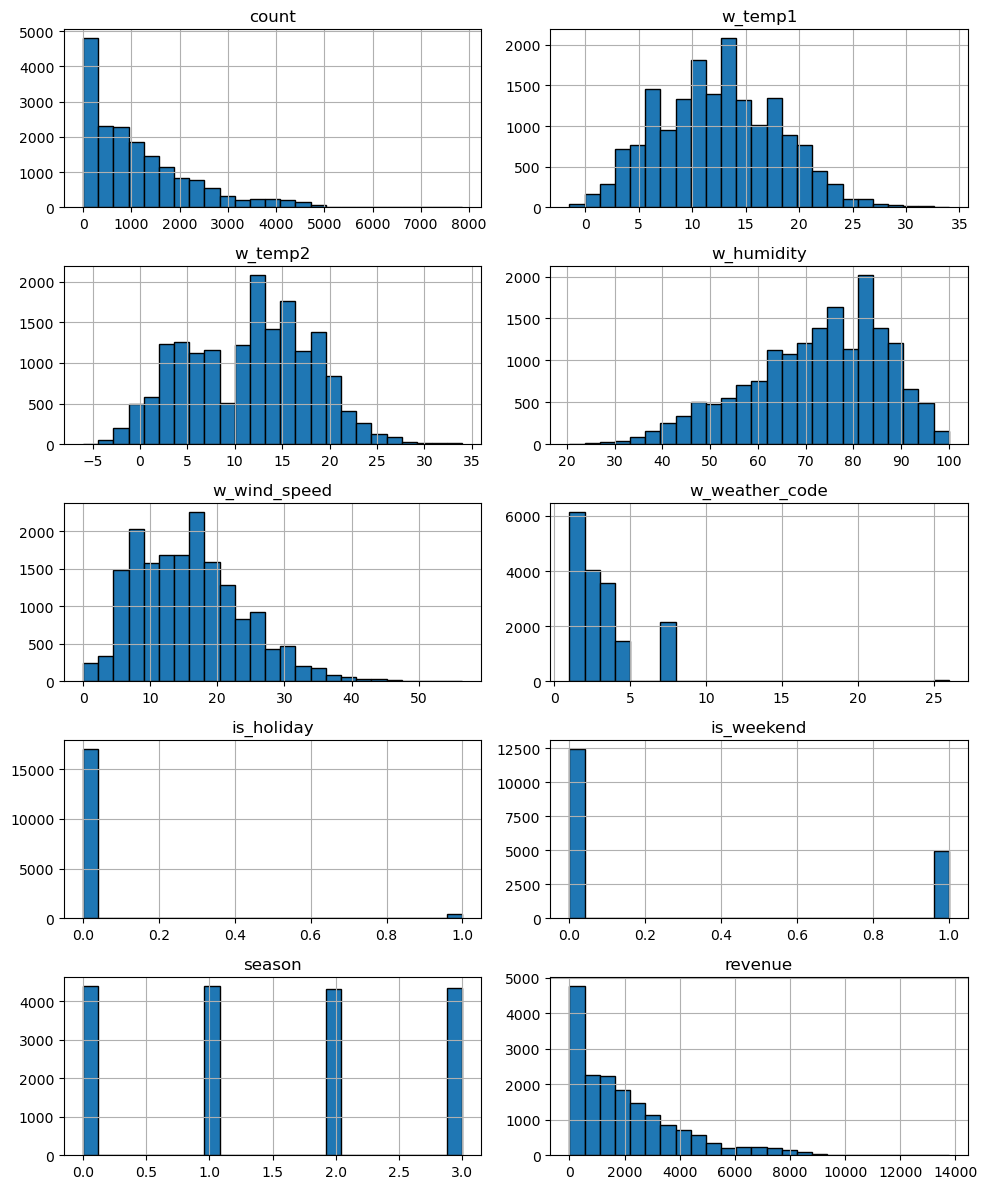

In [16]:
bs.hist(bins=25, figsize=(10, 12), layout=(-1, 2), edgecolor="black")
plt.tight_layout()

In [17]:
bs2 = bs.resample("M")["count", "revenue", "w_temp1"].agg({"count": "sum", "revenue": "sum", "w_temp1": "mean"}).reset_index()
bs2.tail()

,date_time,count,revenue,w_temp1
20,2016-09-30,998619,1807500.39,18.759883
21,2016-10-31,935706,1693627.86,12.602064
22,2016-11-30,703859,1273984.79,8.104312
23,2016-12-31,651908,1179953.48,8.020833
24,2017-01-31,37680,77244.00,4.708333


In [18]:
# declaring a formatting dict: individual for each column
fd = {"date_time":"{:%d/%m/%y}", "count":"{:,}", "revenue":"${:,.2f}", "w_temp1":"{:.1f}"}

# adding some more formatting
(bs2.style.format(fd)
 .hide(axis='index')
 .highlight_min("revenue", color ="orangered")
 .highlight_max("revenue", color ="limegreen")
 .background_gradient(subset = "w_temp1", cmap ="Reds")
 .bar("count", color = "lightblue", align = "zero")
 .set_caption("Total Number of Shared Bikes for each Month")
)

date_time,count,revenue,w_temp1
31/01/15,"546,639","$956,618.25",6.1
28/02/15,"543,594","$951,289.50",5.5
31/03/15,"695,934","$1,217,884.50",8.2
30/04/15,"831,582","$1,455,268.50",10.9
31/05/15,"895,413","$1,566,972.75",13.6
30/06/15,"1,033,252","$1,808,191.00",16.9
31/07/15,"1,120,687","$1,961,202.25",19.1
31/08/15,"1,033,951","$1,809,414.25",18.6
30/09/15,"892,478","$1,561,836.50",14.6
31/10/15,"865,046","$1,513,830.50",12.9


In [19]:
# filtering column based on partial match

bs.filter(like='w_', axis=1)

,w_temp1,w_temp2,w_humidity,w_wind_speed,w_weather_code
date_time,,,,,
2015-01-04 00:00:00,3.0,2.0,93.0,6.0,3.0
2015-01-04 01:00:00,3.0,2.5,93.0,5.0,1.0
2015-01-04 02:00:00,2.5,2.5,96.5,0.0,1.0
2015-01-04 03:00:00,2.0,2.0,100.0,0.0,1.0
2015-01-04 04:00:00,2.0,0.0,93.0,6.5,1.0
...,...,...,...,...,...
2017-01-03 19:00:00,5.0,1.0,81.0,19.0,3.0
2017-01-03 20:00:00,5.0,1.0,81.0,21.0,4.0
2017-01-03 21:00:00,5.5,1.5,78.5,24.0,4.0
